In [103]:
import pandas as pd
import numpy as np
import glob, os
import operator
from random import sample
import matplotlib.pyplot as plt

# hydro_jobs = pd.read_csv('2018.q1-q2 221111 NAICS 221111 Hydroelectric power generation.csv')
# fossil_fuel_jobs = pd.read_csv('2018.q1-q2 221112 NAICS 221112 Fossil fuel electric power generation.csv')
# nuclear_jobs = pd.read_csv('2018.q1-q2 221113 NAICS 221113 Nuclear electric power generation.csv')
# solar_jobs = pd.read_csv('2018.q1-q2 221114 NAICS 221114 Solar electric power generation.csv')
# wind_jobs = pd.read_csv('2018.q1-q2 221115 NAICS 221115 Wind electric power generation.csv')
# geothermal_jobs = pd.read_csv('2018.q1-q2 221116 NAICS 221116 Geothermal electric power generation.csv')
# biomass_jobs = pd.read_csv('2018.q1-q2 221117 NAICS 221117 Biomass electric power generation.csv')
# other_jobs = pd.read_csv('2018.q1-q2 221118 NAICS 221118 Other electric power generation.csv')

# hydro_jobs

In [20]:
revenue_to_provider = pd.read_csv('Datasets/revenue_to_provider.csv')
workforce_training = pd.read_csv('Datasets/energy_workforce_training.csv')
power_plants = pd.read_csv('Datasets/power_plants.csv')
land_temp_city = pd.read_csv('Datasets/land_temp_by_city.csv')
seds = pd.read_csv('Datasets/seds.csv')
vehicles = pd.read_csv('Datasets/vehicles.csv')
land_temp_state = pd.read_csv('Datasets/land_temp_by_state.csv')
air_concentrations = pd.read_csv('Datasets/air_concentrations.csv')

In [28]:
seds['source'] = seds.msn.map(lambda x: x[0:2])
seds['act_sect'] = seds.msn.map(lambda x: x[2:4])
seds['type'] = seds.msn.map(lambda x: x[4])
seds['ren_source'] = seds.source.map(lambda x: x in ['SO', 'NU','HY','GE','BM','WY'])
seds

,year,msn,state_name,state_code,description,energy_bin,value,unit,source,act_sect,type,ren_source
0,1960,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B,False
1,1961,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B,False
2,1962,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B,False
3,1963,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B,False
4,1964,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B,False
5,1965,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B,False
6,1966,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B,False
7,1967,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B,False
8,1968,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B,False
9,1969,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B,False


In [29]:
seds.unit.unique()

array(['Billion Btu', 'Thousand barrels', 'Dollars per million Btu',
       'Million dollars', 'Million Btu per short ton',
       'Thousand short tons', 'Million Btu per barrel',
       'Million kilowatthours', 'Million chained (2009) dollars',
       'Dollars', 'Million cubic feet', 'Thousand Btu per cubic foot',
       'Thousand Btu per cubic feet', 'Million Btu', 'Percent',
       'Thousand Btu per chained (2009) dollar', 'Thousand',
       'Thousand cords', 'Thousand Btu per kilowatthour'], dtype=object)

In [30]:
seds.energy_bin.unique()

array(['Petroleum', 'Renewable', 'Natural Gas', 'Coal', 'Electricity',
       'Aggregate', 'Nuclear'], dtype=object)

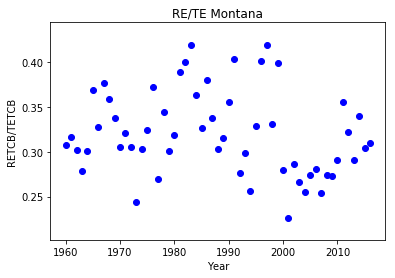

,year,RETCB,TETCB,prop_RE,abs_diff,perc_diff
880054,1960,69936.0,227499.0,0.307412,NaN,NaN
880055,1961,76550.0,241726.0,0.316681,0.009269,2.926773
880056,1962,74894.0,248319.0,0.301604,-0.015077,-4.998901
880057,1963,70429.0,252561.0,0.278859,-0.022745,-8.156305
880058,1964,79375.0,263855.0,0.300828,0.021969,7.302756
880059,1965,95505.0,258879.0,0.368918,0.068089,18.456542
880060,1966,90332.0,275687.0,0.327661,-0.041256,-12.591070
880061,1967,98163.0,260382.0,0.376996,0.049335,13.086253
880062,1968,100651.0,280484.0,0.358848,-0.018149,-5.057452
880063,1969,106143.0,314319.0,0.337692,-0.021156,-6.264763


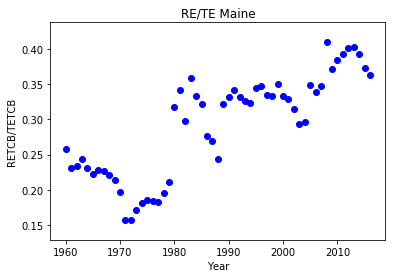

,year,RETCB,TETCB,prop_RE,abs_diff,perc_diff
715659,1960,59784.0,232345.0,0.257307,NaN,NaN
715660,1961,56575.0,244910.0,0.231003,-0.026304,-11.386766
715661,1962,55672.0,237920.0,0.233995,0.002991,1.278403
715662,1963,58874.0,241444.0,0.243841,0.009847,4.038120
715663,1964,55936.0,242748.0,0.230428,-0.013413,-5.820883
715664,1965,51675.0,232211.0,0.222535,-0.007894,-3.547126
715665,1966,55812.0,244303.0,0.228454,0.005919,2.591039
715666,1967,58337.0,256816.0,0.227155,-0.001299,-0.571927
715667,1968,59840.0,271199.0,0.220650,-0.006505,-2.948142
715668,1969,61658.0,288294.0,0.213872,-0.006778,-3.169107


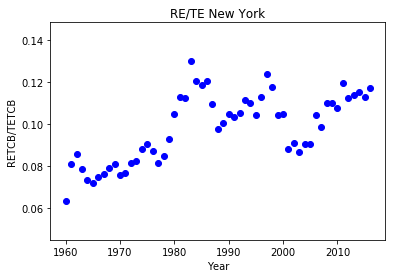

,year,RETCB,TETCB,prop_RE,abs_diff,perc_diff
1143086,1960,189314.0,2989143.0,0.063334,NaN,NaN
1143087,1961,250832.0,3093946.0,0.081072,0.017738,21.879354
1143088,1962,277979.0,3238653.0,0.085832,0.004760,5.545502
1143089,1963,260059.0,3306071.0,0.078661,-0.007171,-9.115854
1143090,1964,247409.0,3382264.0,0.073149,-0.005512,-7.535466
1143091,1965,262743.0,3664836.0,0.071693,-0.001456,-2.030821
1143092,1966,288582.0,3867361.0,0.074620,0.002927,3.922414
1143093,1967,301664.0,3955854.0,0.076258,0.001638,2.147642
1143094,1968,320307.0,4052487.0,0.079040,0.002782,3.519748
1143095,1969,339647.0,4200710.0,0.080855,0.001815,2.244834


,year,msn,state_name,state_code,description,energy_bin,value,unit,source,act_sect,type,ren_source
156716,1960,RETCB,California,CA,Renewable energy total consumption,Renewable,270161.0,Billion Btu,RE,TC,B,False
156717,1961,RETCB,California,CA,Renewable energy total consumption,Renewable,248178.0,Billion Btu,RE,TC,B,False
156718,1962,RETCB,California,CA,Renewable energy total consumption,Renewable,329046.0,Billion Btu,RE,TC,B,False
156719,1963,RETCB,California,CA,Renewable energy total consumption,Renewable,360333.0,Billion Btu,RE,TC,B,False
156720,1964,RETCB,California,CA,Renewable energy total consumption,Renewable,331757.0,Billion Btu,RE,TC,B,False
156721,1965,RETCB,California,CA,Renewable energy total consumption,Renewable,418518.0,Billion Btu,RE,TC,B,False
156722,1966,RETCB,California,CA,Renewable energy total consumption,Renewable,375877.0,Billion Btu,RE,TC,B,False
156723,1967,RETCB,California,CA,Renewable energy total consumption,Renewable,473192.0,Billion Btu,RE,TC,B,False
156724,1968,RETCB,California,CA,Renewable energy total consumption,Renewable,397366.0,Billion Btu,RE,TC,B,False
156725,1969,RETCB,California,CA,Renewable energy total consumption,Renewable,544918.0,Billion Btu,RE,TC,B,False


In [159]:
btus = seds.loc[seds.type == 'B']
test = btus.loc[(btus.year == 2000) & (btus.state_name == 'California') & (btus.energy_bin == 'Aggregate') & (btus.act_sect == 'TC')]
al_test = seds.loc[(seds.state_name == 'Alaska') & (seds.msn == 'RETCB')]
total = seds.loc[(seds.state_name == 'California') & (seds.msn == 'TETCB')]

def re_prop(state):
    state_RETCB = seds.loc[(seds.state_name == state) & (seds.msn == 'RETCB')]
    state_TETCB = seds.loc[(seds.state_name == state) & (seds.msn == 'TETCB')]

    # Create a plot with a caption, X and Y legends, etc
    x_label = 'Year'
    y_label = 'RETCB/TETCB'
    plt.title('RE/TE ' + state)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.scatter(state_RETCB.year, (state_RETCB.value.values)/(state_TETCB.value.values), color='blue', label='Points')
#     plt.plot(state_RETCB.year, (state_RETCB.value.values)/(state_TETCB.value.values), color='blue', label='Points')

    plt.show()
    out = pd.DataFrame(state_RETCB.year)
    out['RETCB'] = state_RETCB.value.values
    out['TETCB'] = state_TETCB.value.values
    out['prop_RE'] = out['RETCB'] / out['TETCB']
    out['abs_diff'] = out['prop_RE'].diff()
    out['perc_diff'] = 100*out['prop_RE'].diff()/(out['prop_RE'])
    display(out)
        

# re_prop('California')
# re_prop('Texas')
# re_prop('Pennsylvania')
# re_prop('New Jersey')
# re_prop('Utah')
re_prop('Montana')
re_prop('Maine')
re_prop('New York')
state_RETCB

#difference in fraction
#growth in fraction as a percentage
#difference in growth percentage